# Zestaw zadań: Aproksymacja
## Zadanie 2
### Autor: Artur Gęsiarz

In [118]:
import numpy as np
import matplotlib.pyplot as plt

### Funkcja pierwiastka kwadratowego

In [119]:
def sqrt_func(x):
    return np.sqrt(x)

### Przekształcenie przedziału [0, 2] na [-1, 1]

In [120]:
def transform_to_interval(x, a, b):
    return (2 * x - (a + b)) / (b - a)

### Przekształcenie z powrotem do oryginalnego przedziału

In [121]:
def transform_back(x, a, b):
    return 0.5 * ((b - a) * x + (a + b))

### Funkcja generująca węzły Czebyszewa

In [122]:
def chebyshev_nodes(n):
    k = np.arange(1, n + 1)
    nodes = np.cos((2 * k - 1) * np.pi / (2 * n))
    return nodes

### Aproksymacja wielomianowa wielomianem stopnia 2 przy użyciu węzłów Czebyszewa

In [123]:
def chebyshev_approximation(f, n):
    nodes = chebyshev_nodes(n)

    # Obliczanie wartości funkcji w węzłach
    values = f(nodes)

    # Obliczanie współczynników aproksymacji
    coeffs = np.fft.fft(values) / len(values)

    return coeffs[:3].real, nodes

###  Funkcja obliczająca wartość wielomianu Czebyszewa dla danego x i współczynników

In [124]:
def chebyshev_polynomial(x, coeffs):
    n = len(coeffs)
    result = coeffs[0] / 2
    for i in range(1, n):
        result += coeffs[i] * np.cos(i * np.arccos(x))
    return result

### Aproksymacja wielomianowa

In [125]:
degree = 2
coeffs, nodes = chebyshev_approximation(sqrt_func, degree + 1)

/var/folders/cw/20db57g90t309rc9w5fqkvjr0000gn/T/ipykernel_4288/2835154769.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(x)


### Wyświetlenie wyników

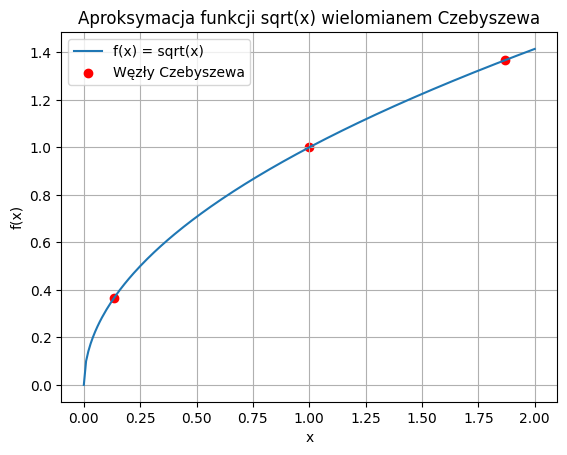

In [126]:
x_values = np.linspace(0, 2, 200)
y_values = sqrt_func(x_values)
approx_values = np.polynomial.chebyshev.chebval(transform_back(x_values, 0, 2), coeffs)

plt.plot(x_values, y_values, label="f(x) = sqrt(x)")
plt.scatter(transform_back(nodes, 0, 2), sqrt_func(transform_back(nodes, 0, 2)), color='red', label='Węzły Czebyszewa')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Aproksymacja funkcji sqrt(x) wielomianem Czebyszewa')
plt.legend()
plt.grid(True)
plt.show()